In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# 读取训练集与测试集
train_data = pd.read_csv("traindata.csv")
test_data = pd.read_csv("testdata.csv")

In [4]:
train_data_male = train_data.loc[train_data['gender']=='Male']
train_data_female = train_data.loc[train_data['gender']=='Female']
height_male = train_data_male['height']#训练集男生的身高
weight_male = train_data_male['weight']#训练集男生的体重
height_female = train_data_female['height']#训练集女生的身高
weight_female = train_data_female['weight']#训练集女生的体重

test_data_male = test_data.loc[test_data['gender']=='Male']
test_data_female = test_data.loc[test_data['gender']=='Female']
test_height_male = test_data_male['height']#测试集男生的身高
test_weight_male = test_data_male['weight']#测试集男生的体重
test_height_female = test_data_female['height']#测试集女生的身高
test_weight_female = test_data_female['weight']#测试集女生的体重

In [5]:
#均值与方差
def mv_var(data):
    mean_value = data.mean()
    variance = np.sqrt(((data-mean_value)**2).mean())
    return mean_value,variance

In [6]:
#极大似然估计
[male_height_mv,male_height_var] = mv_var(np.array(height_male)) #男性身高的均值与方差
[female_height_mv,female_height_var] = mv_var(np.array(height_female)) #女性身高的均值与方差
[male_weight_mv,male_weight_var] = mv_var(np.array(weight_male)) #男性体重的均值与方差
[female_weight_mv,female_weight_var] = mv_var(np.array(weight_female)) #女性体重的均值与方差

In [7]:
#贝叶斯估计
mean_value = 0
variance = 0
male_num = len(height_male)
male_mv_height_bayes = (1/(male_num+male_height_var**2))*(height_male.sum()) #男性身高贝叶斯估计
female_num = len(height_female)
female_mv_height_bayes = (1/(female_num+female_height_var**2))*(height_female.sum()) #女性身高贝叶斯估计
male_mv_height_bayes,female_mv_height_bayes

(123.50657153633057, 115.58001024953455)

In [8]:
#获得男性与女性的身高与体重
train_data_male_hw = train_data_male[['height','weight']] #男性的身高与体重
train_data_female_hw = train_data_female[['height','weight']] #女性的身高与体重

In [9]:
#先验概率
p_male = len(train_data_male_hw)/(len(train_data_male_hw)+len(train_data_female_hw))
p_female = 1-p_male
# 协方差矩阵
var_male = np.cov(train_data_male_hw.T)
var_female = np.cov(train_data_female_hw.T)
#均值
mean_male = np.array([male_height_mv,male_weight_mv]).reshape(-1,1)
mean_female = np.array([female_height_mv,female_weight_mv]).reshape(-1,1)
mean_male

array([[174.134],
       [ 66.608]])

C:\Users\admin\AppData\Local\Temp/ipykernel_5800/1114934483.py:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(sample_height,sample_weight,sample,0,colors='red',linewidth=2)


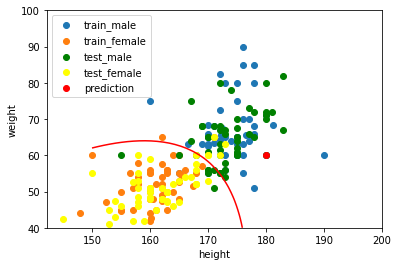

In [10]:
sample_height = np.linspace(150,200,50)
sample_weight = np.linspace(40,100,50)
sample = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        x = np.array([sample_height[i],sample_weight[j]]).reshape((-1,1))
        sample[i,j] = 0.5*(np.dot(np.dot((x-mean_male).T,np.linalg.inv(var_male)),(x-mean_male))-np.dot(np.dot((x-mean_female).T,np.linalg.inv(var_female)),(x-mean_female)))+0.5*math.log(np.linalg.det(var_male)/np.linalg.det(var_female))-math.log(p_male/p_female)

plt.xlabel('height')
plt.ylabel('weight')
#训练集
plt.scatter(height_male,weight_male,label='train_male')
plt.scatter(height_female,weight_female,label='train_female')
#测试集
plt.scatter(test_height_male,test_weight_male,label='test_male',c='green')
plt.scatter(test_height_female,test_weight_female,label='test_female',c='yellow')
#预测
plt.scatter(180,60,c='red',label='prediction')
#分类
plt.contour(sample_height,sample_weight,sample,0,colors='red',linewidth=2)
plt.legend()


plt.show()